In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [13]:
house_price_dataset = pd.read_csv("C:/Users/Admin/Downloads/kc_house_data.csv")
house_price_dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
house_price_dataset.dropna(inplace = True)

In [17]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
house_price_dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
house_price_dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
X = house_price_dataset.drop(['price'], axis=1)
Y = house_price_dataset['price']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [24]:
train_data= X_train.join(Y_train)

In [25]:
train_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
19323,5553300375,20140820T000000,3,3.50,3080,6495,2.0,0,3,3,...,2530,550,1996,2006,98199,47.6321,-122.393,4120,8620,2160000.0
17734,8824900120,20140606T000000,4,3.00,2720,3800,2.0,0,0,5,...,1800,920,1919,0,98115,47.6756,-122.306,1940,4001,739000.0
16235,224069169,20141023T000000,4,3.75,2540,20662,2.0,0,0,3,...,2540,0,1998,0,98075,47.5882,-122.010,2490,37731,800000.0
13464,3420069060,20141107T000000,3,2.50,2640,432036,1.5,0,3,3,...,2640,0,1996,0,98022,47.1795,-122.036,1500,560617,790000.0
12506,9560800040,20140716T000000,3,2.50,1800,11034,2.0,0,0,4,...,1800,0,1987,0,98072,47.7558,-122.142,1940,8900,485000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,4113800500,20150212T000000,3,2.50,2490,7589,2.0,0,0,3,...,2490,0,1991,0,98056,47.5355,-122.179,2500,10386,572500.0
8985,9468200100,20140710T000000,4,1.00,1140,5940,1.0,0,2,3,...,1140,0,1916,0,98103,47.6795,-122.354,1630,4000,569950.0
17131,8581400345,20150409T000000,4,3.00,2210,4191,2.0,0,0,3,...,2210,0,2004,0,98002,47.2959,-122.225,890,4288,315000.0
9768,2705600069,20150501T000000,3,2.25,1310,1264,3.0,0,0,3,...,1310,0,2014,0,98117,47.6987,-122.366,1330,2183,514950.0


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title=

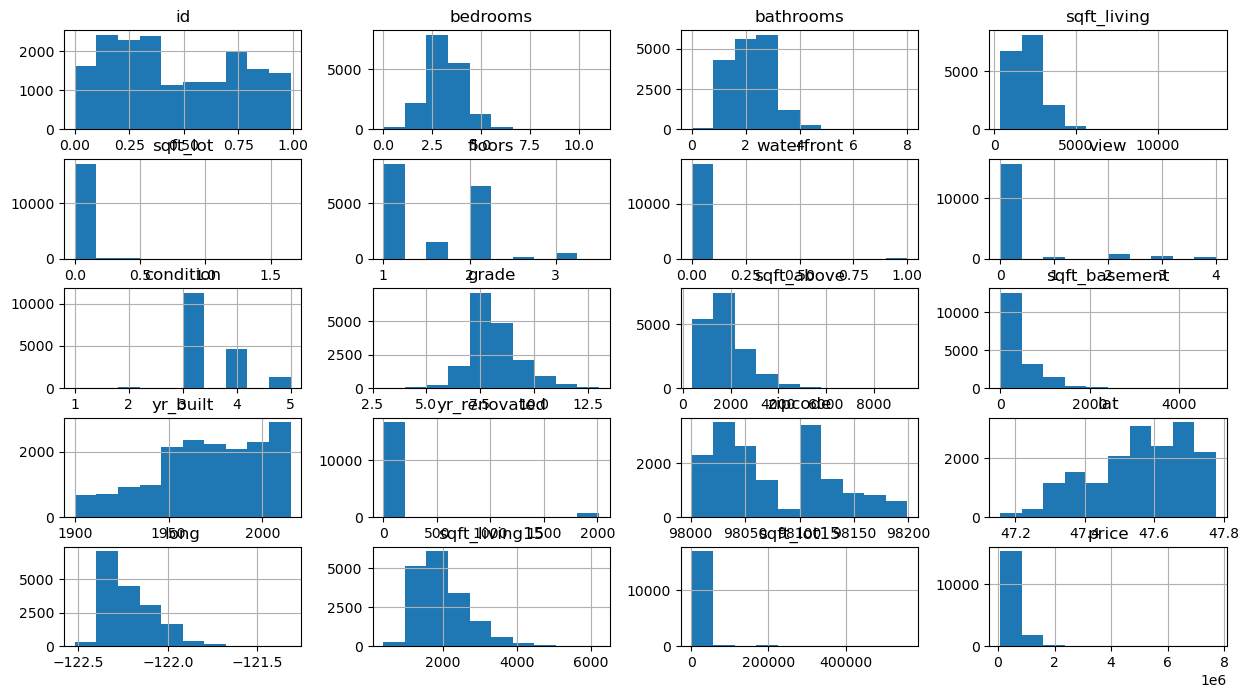

In [27]:
train_data.hist(figsize = (15, 8))

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

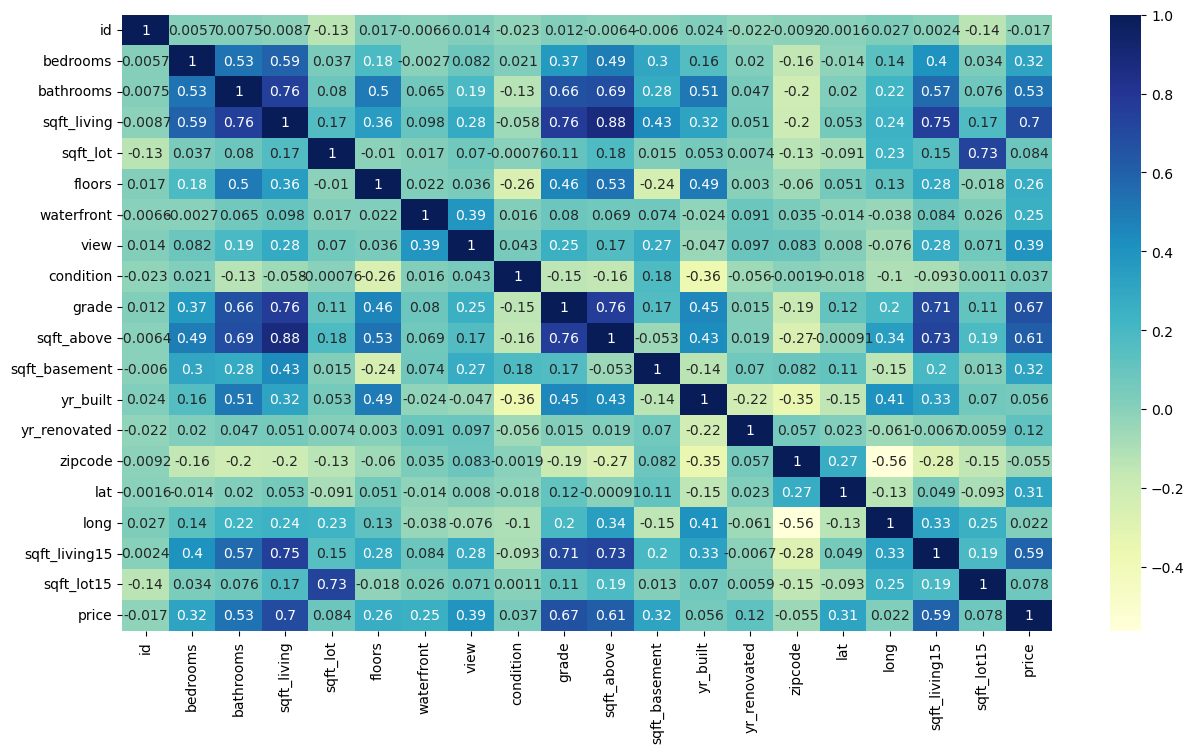

In [34]:
numeric_train_data = train_data.select_dtypes(include=[float, int])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [38]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+ 1)
train_data['floors'] = np.log(train_data['floors']+ 1)
train_data['sqft_living'] = np.log(train_data['sqft_living']+ 1)
train_data['yr_renovated'] = np.log(train_data['yr_renovated']+ 1)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title=

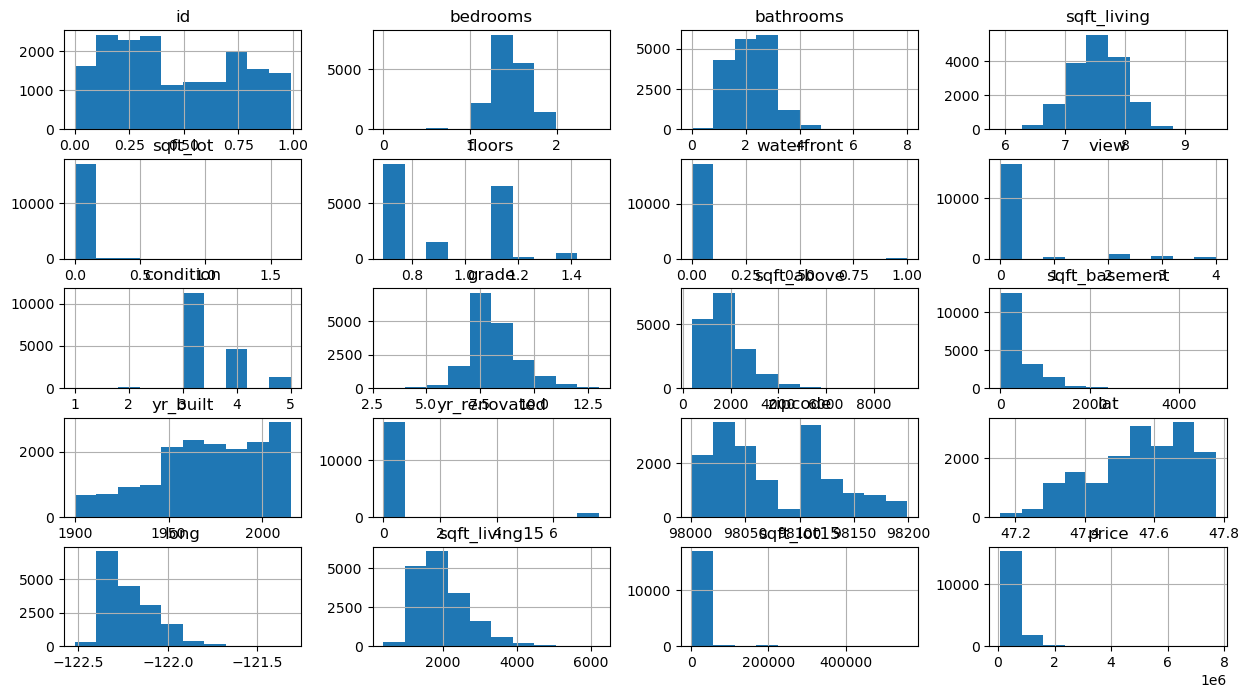

In [39]:
train_data.hist(figsize=(15, 8))

In [41]:
X_train = X_train.select_dtypes(include=[float, int])


In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [44]:
test_data= X_test.join(Y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms']+ 1)
test_data['floors'] = np.log(test_data['floors']+ 1)
test_data['sqft_living'] = np.log(test_data['sqft_living']+ 1)
test_data['yr_renovated'] = np.log(test_data['yr_renovated']+ 1)

In [45]:
test_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4048,1105000745,20150123T000000,1.386294,1.50,7.359468,10824,1.098612,0,0,3,...,1570,0,1908,0.0,98118,47.5400,-122.275,1530,8125,227064.0
4941,3343901403,20141216T000000,1.609438,2.50,7.983099,8679,1.098612,0,0,3,...,2930,0,2014,0.0,98056,47.5164,-122.190,2030,7264,635000.0
8877,9285800801,20140926T000000,1.386294,1.00,7.378384,4489,0.693147,0,2,3,...,800,800,1944,0.0,98126,47.5686,-122.378,1640,6013,364500.0
14654,203100910,20140923T000000,1.791759,2.50,7.741099,28480,1.098612,0,0,3,...,2300,0,1994,0.0,98053,47.6403,-121.964,1880,26720,475000.0
13401,7202340450,20141123T000000,1.386294,2.50,7.433075,4000,1.098612,0,0,3,...,1690,0,2004,0.0,98053,47.6788,-122.034,1690,4000,452000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,7893804845,20150223T000000,1.098612,1.00,7.438972,6718,0.693147,0,2,3,...,1230,470,1956,0.0,98198,47.4131,-122.331,2040,7500,340000.0
7789,8731982550,20141210T000000,1.609438,1.75,7.611348,8800,0.693147,0,0,4,...,2020,0,1969,0.0,98023,47.3202,-122.384,2320,8000,245000.0
9940,9186300060,20140916T000000,1.791759,3.25,8.219057,34200,1.098612,0,0,3,...,2510,1200,1986,0.0,98074,47.6101,-122.047,1720,23100,635000.0
19683,1624049293,20140506T000000,1.791759,3.75,7.969358,5000,0.693147,0,0,3,...,1310,1580,2006,0.0,98108,47.5701,-122.296,1930,5117,390000.0


In [49]:
X_test = X_test.select_dtypes(include=[float, int])

In [50]:
reg.score(X_test, Y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.6988014689625313

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [54]:
X_train_s = scaler.fit_transform(X_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [55]:
X_test_s = scaler.transform(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [57]:
from sklearn.ensemble import RandomForestRegressor

Forest = RandomForestRegressor()
Forest.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestRegressor()

In [58]:
Forest.score(X_test, Y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.8819548899962941

In [59]:
Forest.score(X_test_s, Y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.6651691872312246

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = { "n_estimators": [100,200,300],
                    "min_samples_split":[2,4],
                     "max_depth":[None, 4, 8]
                     }

grid_search = GridSearchCV(Forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, min_samples_split=4, n_estimators=30)

In [73]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.8830112493139463

In [74]:
best_forest = grid_search.best_estimator_

In [75]:
best_forest.score(X_test_s, Y_test)

0.8830112493139463